In [1]:
# Importing all the important libraries required for this assignment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr

import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

### Reading and Understanding The Data

In [2]:
# Reading the data from csv file into a dataframe

bikes = pd.read_csv('day.csv')

In [3]:
# Inspecting the first few rows of the data to understand how the data looks like

bikes.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [4]:
# Checking the number oif rows and columns in the dataset

bikes.shape

(730, 16)

In [5]:
# Inspecting the descriptive information

bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Looking at the summary statistics

bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**Findings:**
- Dataset consistes of 730 rows and 16 columns.
- Except one column 'dteday' which is of 'object' datatype, all the other columns are either 'int64' or 'float64'.
- From the look of data, the columns 'mnth', 'yr', 'season', 'weekday' and 'weathersit' appear to be categorical in nature although their datatype is interger/float.

### Data Quality Check

##### Checking for null values

In [7]:
# percentage of missing values in each column

round(100*(bikes.isnull().sum()/len(bikes)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [8]:
# row-wise null count percentage

round((bikes.isnull().sum(axis=1)/len(bikes))*100,2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

##### Duplicate Values

In [9]:
# Checking for duplicates and dropping the entire duplicate row if any

bike_dup = bikes.copy()
bike_dup.drop_duplicates(subset=None, inplace=True)

In [10]:
# Printing the shape of the originla and duplicate dataset to check if there is any difference after dropping duplicates

print(f'Duplicate Dataset Shape - {bike_dup.shape}')
print(f'Original Dataset Shape - {bikes.shape}')

Duplicate Dataset Shape - (730, 16)
Original Dataset Shape - (730, 16)


**Findings:**
- There are no missing/null values either in columns or rows.
- There are no duplicate rows in the dataset as the shape of original and suplicate dataset is the same.

### Data Cleaning

##### Removing Unwanted Columns

Logic:
Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

- instant : It's only an index value for the records and hence can be dropped from analysis.
- dteday : This has the date but since we already have seperate columns for 'year' & 'month', hence, we could live without this column.
- casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. 

In [11]:
# Removing 'instant' column as it's just a record index

bikes = bikes.drop('instant', axis=1)

In [12]:
# Removing the 'dteday' column as we have separate columns for month and year, so this will have redundant information

bikes = bikes.drop('dteday', axis=1)

In [13]:
# Removing 'casual' and 'registered' as we have the total count column 'cnt' and we're not interested in paritcular
# segments here

bikes = bikes.drop(['casual', 'registered'], axis=1)

In [14]:
# Inspecting the remaining columns in the dataframe

bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


##### Correcting The Labels For Categorical Variables To Perform EDA

In [15]:
# Correcting the labels for 'season' feature using Readme.txt file

bikes['season'] = bikes['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [16]:
# Correcting the labels for 'weekday' feature using Readme.txt file

bikes['weekday'] = bikes['weekday'].map({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday',
                                         6:'Saturday'})

In [17]:
# Correcting the labels for 'weekday' feature using Readme.txt file


bikes['weathersit'] = bikes['weathersit'].map({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",
                             4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'})

In [18]:
# Correcting the labels for 'mnth' feature using Readme.txt file

bikes['mnth'] = bikes['mnth'].map({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July',
                      8:'August', 9:'September', 10:'October', 11:'November', 12:'December'})

In [19]:
# Inspecting the dataframe after the above changes

bikes.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Monday,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,January,0,Saturday,0,Clear_Few Clouds,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,January,0,Sunday,0,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,January,0,Monday,1,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,January,0,Tuesday,1,Clear_Few Clouds,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,January,0,Wednesday,1,Clear_Few Clouds,6.184153,7.54440,48.2917,14.958889,1321


In [20]:
# Taking a look at the datatypes of the columns now

bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### Exploratory Data Anslysis

##### EDA for Numerical Features

In [21]:
# Extracting numerical features from the dataset into a list

numerical_features = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

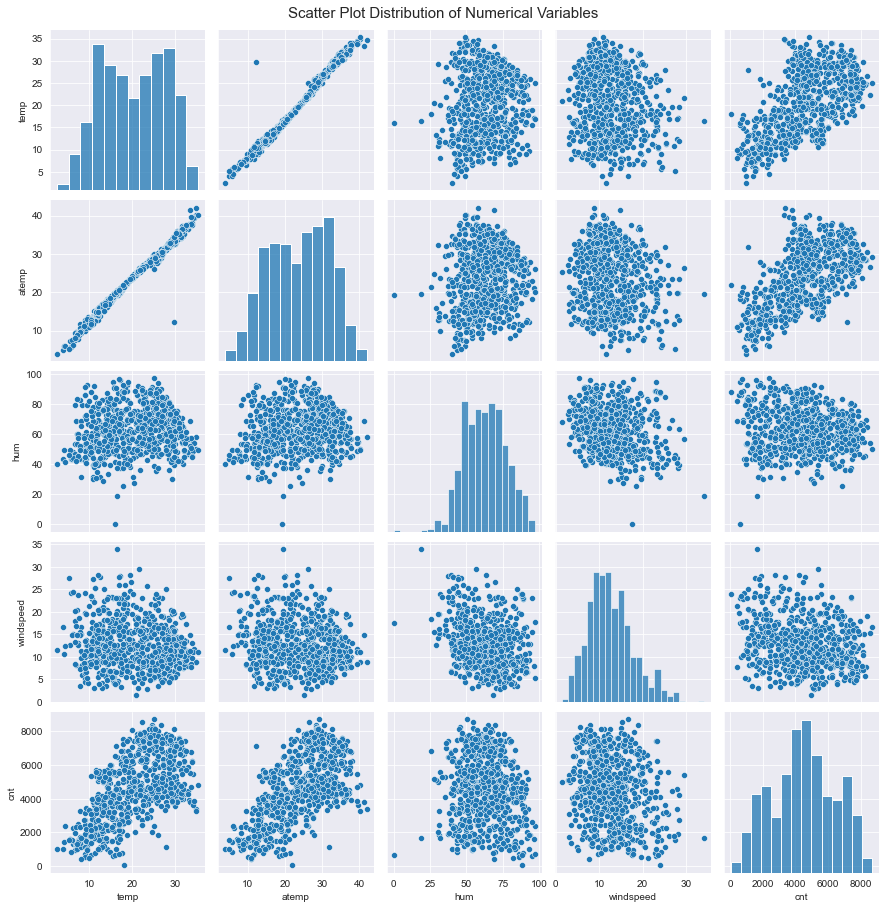

In [22]:
# Plotting seaborn pairplot between numerical variables

fig = sns.pairplot(bikes[numerical_features])
fig.fig.suptitle('Scatter Plot Distribution of Numerical Variables', fontsize=15, y=1.01)
plt.show()

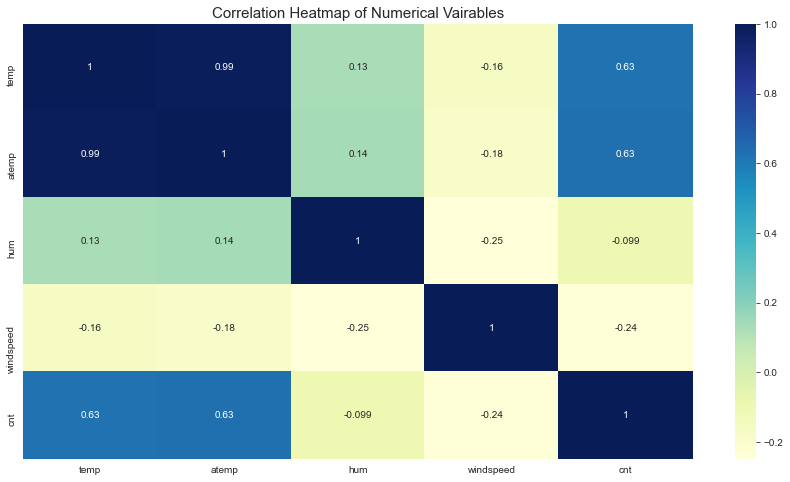

In [23]:
# Inspecting the correlation between numerical variables using heatmap

plt.figure(figsize = (15,8))
plt.title("Correlation Heatmap of Numerical Vairables", fontdict={'fontsize':15})
sns.heatmap(bikes[numerical_features].corr(), cmap='YlGnBu', annot=True)
plt.show()

##### EDA For Categorical Features

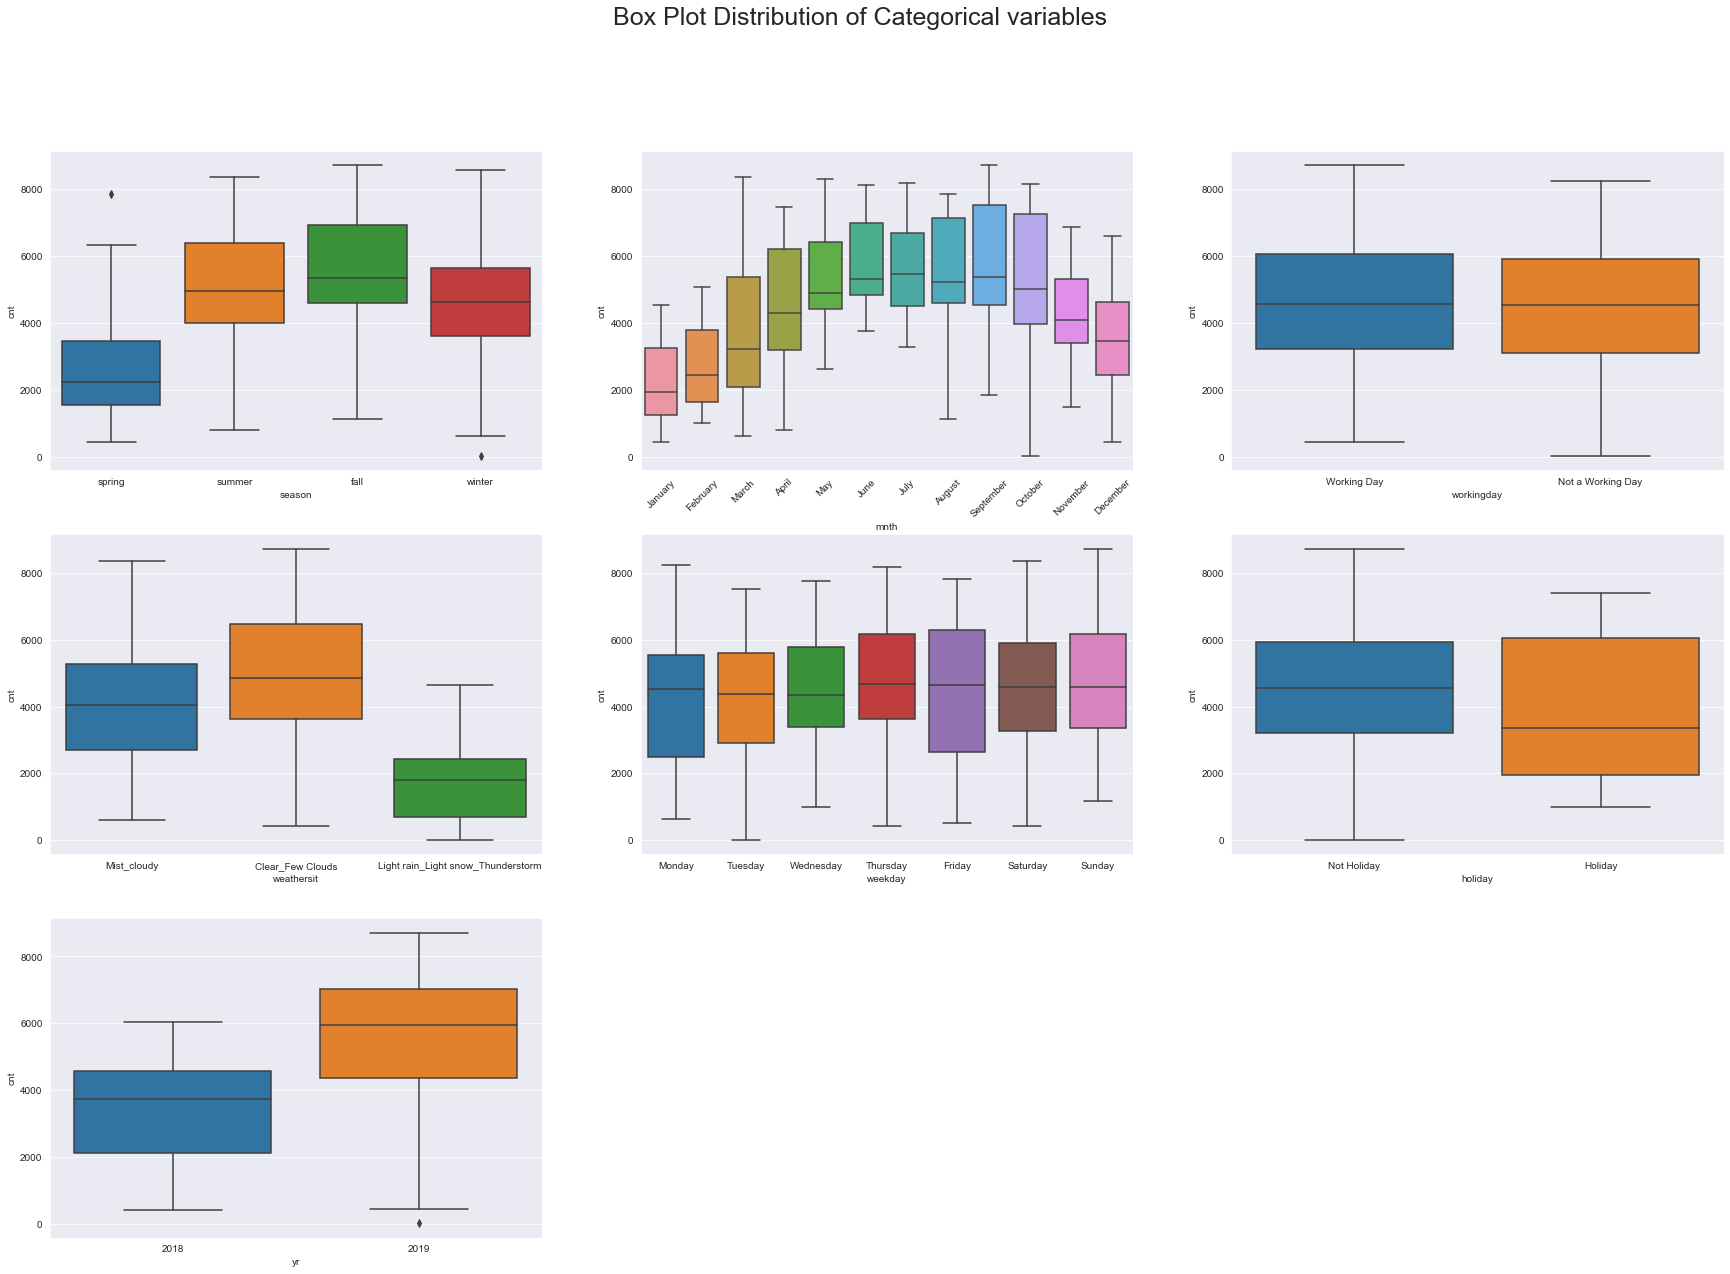

In [24]:
# Plotting boxplots for each categorical feature vs count in different subplots

plt.figure(figsize=(30, 20))
plt.suptitle('Box Plot Distribution of Categorical variables', fontsize=25)
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(3,3,2)
ax = sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
ax.set_xticklabels(bikes['mnth'].unique(), rotation=45)
plt.subplot(3,3,3)
ax = sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)
ax.set_xticklabels(['Working Day', 'Not a Working Day'])
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(3,3,6)
ax = sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
ax.set_xticklabels(['Not Holiday', 'Holiday'])
plt.subplot(3,3,7)
ax = sns.boxplot(x = 'yr', y = 'cnt', data = bikes)
ax.set_xticklabels(['2018', '2019'])
plt.show()

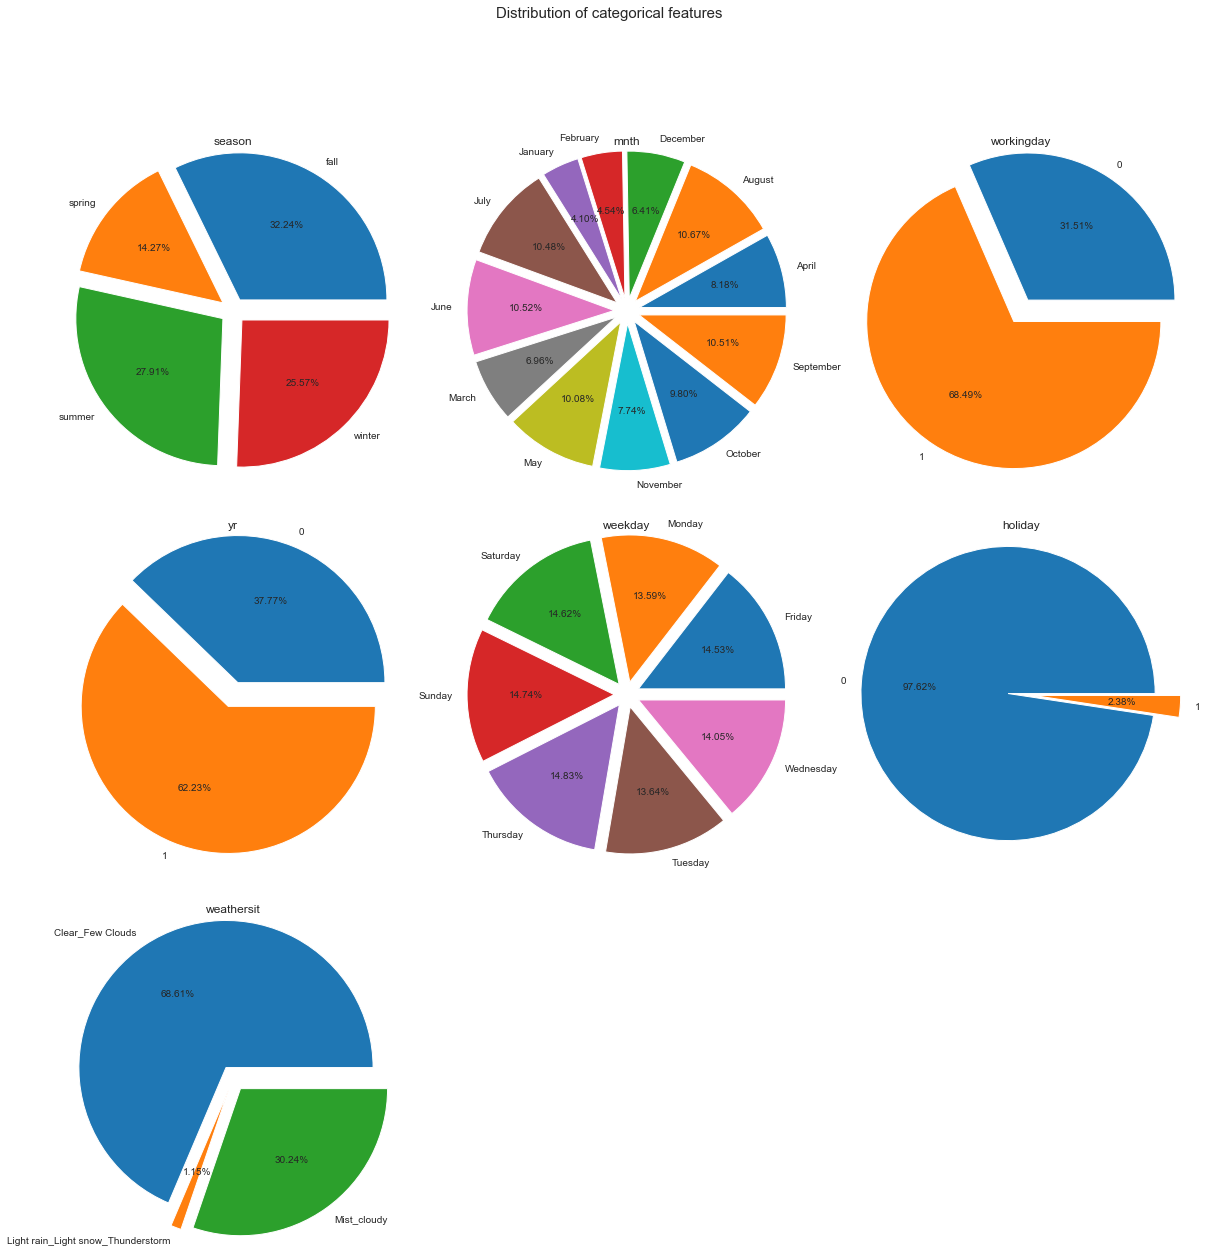

In [25]:
# Visulalising Categorical Variables using pie chart

df_piplot=bikes[['season', 'mnth', 'workingday', 'yr', 'weekday', 'holiday', 'weathersit', 'cnt']]
plt.figure(figsize=(20,20))
plt.suptitle('Distribution of categorical features', fontsize=15)
for i in range(1,8):
    plt.subplot(3,3,i)
    f=plt.gca()
    name = df_piplot.columns.values[i-1]
    f.set_title(name)
    df = bikes[[name, 'cnt']]
    df = df.groupby(by=name).sum()
    plt.pie(x=df.cnt, labels=df.index, autopct="%.2f%%", radius=1.15, explode=[0.1]*len(df.index))
plt.show()

**Findings:**
- Numerical Features:
    - There is a strong positive correlation between 'temp' and 'atemp' features close of around 0.99. This would potentially lead to multicollinearity.
    - 'temp' and 'atemp' features also dsiplay a positive correlation with the target variable 'cnt' individually of around 0.63.
- Categorical Features:
    - **season**: Almost 32% of the bike booking were happening in fall season with a median of over 5000 booking (for the period of 2 years). This was followed by summer season & winter season with 27% & 25% of total booking. This indicates, season might be be a good predictor for the dependent variable.
    - **mnth**: Almost 10% of the bike booking were happening in the months May, June, July, August & September with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable. 
    - **weathersit**: Almost 67% of the bike booking were happening when weather is either clear or has few clouds with a median of close to 5000 booking (for the period of 2 years). This was followed by mostly couldy weather with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.
    - **holiday**: Almost 97% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday would not be a good predictor for the dependent variable. 
    - **weekday**: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. We'll will let the model decide if this needs to be added or not.
    - **workingday**: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday might be a good predictor for the dependent variable.
    - **year**: Year 2019 has greater number of bookings as compared to 2018 with north of 62% of the total bookings in 2 years.

### Adding Dummy Variables For Categorical Columns To Apply Linear Regression

In [26]:
# Adding dummy features for 'season', 'mnth', 'weekday' and 'weathersit' categorical features

bikes = pd.get_dummies(bikes, columns = ['season', 'mnth', 'weekday', 'weathersit'], drop_first = True)
bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Inspecting the shape of the dataframe 

bikes.shape

(730, 30)

### Splitting The Data Into Train and Test Datasets

In [28]:
np.random.seed(0)
df_train, df_test = train_test_split(bikes, train_size=0.7, test_size=0.3, random_state=333)

print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


### Rescaling Numerical Features

In [29]:
# Creating the MinMaxScaler scaler object

scaler = MinMaxScaler()

In [30]:
# Applying scaler to numerical features

df_train[numerical_features] = scaler.fit_transform(df_train[numerical_features])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
483,1,0,1,0.497426,0.487055,0.609956,0.194850,0.722734,0,1,...,0,0,1,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,1,0,0,0,1,0,0,0,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,0,...,0,0,0,0,0,0,0,1,0,0
714,1,0,1,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,0,1,0,0,0,0,0,0,1
8,0,0,1,0.098690,0.048706,0.451083,0.700017,0.092039,1,0,...,0,0,0,0,0,0,1,0,0,0


In [31]:
# Inspecting summary statistics. min values should be 0 and max value should be 1 for numerical features

df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.692157,0.540901,0.515631,0.647390,0.346318,0.515144,0.24902,0.247059,...,0.084314,0.082353,0.143137,0.143137,0.143137,0.139216,0.152941,0.131373,0.025490,0.341176
std,0.500487,0.151726,0.462054,0.227898,0.213626,0.149722,0.160266,0.224281,0.43287,0.431725,...,0.278131,0.275172,0.350557,0.350557,0.350557,0.346511,0.360284,0.338139,0.157763,0.474570
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Model Building

##### Diving training data into x and y

In [32]:
# Diving training dataset into x and y train

y_train = df_train.pop('cnt')
x_train = df_train

##### Using Automated Technique RFE (Recursive Feature Elimination) for Intial Feature Selection

In [33]:
# Fitting LinearRegression model on training dataset

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [34]:
# Using Recursive Feature Elimination to get the top 15 features 

rfe = RFE(model, 15)
rfe = rfe.fit(x_train, y_train)

In [35]:
# Checking and the support and ranking for each column

list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 8),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 13),
 ('season_winter', True, 1),
 ('mnth_August', False, 9),
 ('mnth_December', True, 1),
 ('mnth_February', False, 6),
 ('mnth_January', False, 5),
 ('mnth_July', True, 1),
 ('mnth_June', False, 14),
 ('mnth_March', True, 1),
 ('mnth_May', False, 4),
 ('mnth_November', True, 1),
 ('mnth_October', False, 12),
 ('mnth_September', True, 1),
 ('weekday_Monday', False, 10),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 2),
 ('weekday_Thursday', False, 15),
 ('weekday_Tuesday', False, 7),
 ('weekday_Wednesday', False, 11),
 ('weathersit_Light rain_Light snow_Thunderstorm', True, 1),
 ('weathersit_Mist_cloudy', True, 1)]

In [36]:
# Selecting features from RFE having support as True

rfe_features = x_train.columns[rfe.support_]
rfe_features

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_December', 'mnth_July', 'mnth_March',
       'mnth_November', 'mnth_September', 'weekday_Saturday',
       'weathersit_Light rain_Light snow_Thunderstorm',
       'weathersit_Mist_cloudy'],
      dtype='object')

In [37]:
# Keeping only the RFE features in the dataset

x_train_rfe = x_train[rfe_features]

In [38]:
# Checkign the features selected by RFE

x_train_rfe.head()

,yr,temp,atemp,hum,windspeed,season_spring,season_winter,mnth_December,mnth_July,mnth_March,mnth_November,mnth_September,weekday_Saturday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
483,1,0.497426,0.487055,0.609956,0.194850,0,0,0,0,0,0,0,0,0,0
650,1,0.416433,0.409971,0.513852,0.255118,0,1,0,0,0,0,0,0,0,0
212,0,0.887856,0.819376,0.572294,0.276919,0,0,0,0,0,0,0,0,0,0
714,1,0.378013,0.381804,0.871429,0.161523,0,1,1,0,0,0,0,0,0,1
8,0,0.098690,0.048706,0.451083,0.700017,1,0,0,0,0,0,0,0,0,0


##### Model 1

In [39]:
# Building 1st model using statsmodels librabry

x_train_sm = sm.add_constant(x_train_rfe)

lr1 = sm.OLS(y_train, x_train_sm).fit()

In [40]:
# Checking the summary of the model

lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     169.1
Date:                Wed, 28 Jul 2021   Prob (F-statistic):          1.78e-183
Time:                        12:17:17   Log-Likelihood:                 501.75
No. Observations:                 510   AIC:                            -971.5
Df Residuals:                     494   BIC:                            -903.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.3609      0.033     10.863      0.000       0.296       0.426
yr                                                0.2287      0.008     27.609      0.000       0.212       0.245
temp                                              0.2959      0.131      2.253      0.025       0.038       0.554
atemp                                             0.1669      0.138      1.211      0.227      -0.104       0.438
hum                                              -0.1664      0.038     -4.362      0.000      -0.241      -0.091
windspeed                                        -0.1805      0.028     -6.386      0.000      -0.236      -0.125
season_spring                                    -0.1243      0.016     -8.014      0.000      -0.155      -0.094
season_winter                                     0.0766      0.014      5.373      0.000       0.049       0.105
mnth_December                                    -0.0413      0.017     -2.362      0.019      -0.076      -0.007
mnth_July                                        -0.0513      0.017     -2.964      0.003      -0.085      -0.017
mnth_March                                        0.0452      0.016      2.792      0.005       0.013       0.077
mnth_November                                    -0.0587      0.019     -3.101      0.002      -0.096      -0.022
mnth_September                                    0.0623      0.016      3.972      0.000       0.031       0.093
weekday_Saturday                                  0.0207      0.012      1.753      0.080      -0.003       0.044
weathersit_Light rain_Light snow_Thunderstorm    -0.2642      0.029     -9.179      0.000      -0.321      -0.208
weathersit_Mist_cloudy                           -0.0486      0.011     -4.481      0.000      -0.070      -0.027
==============================================================================
Omnibus:                       76.273   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.238
Skew:                          -0.788   Prob(JB):                     3.26e-39
Kurtosis:                       5.421   Cond. No.                         76.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# Checking vif values for all the features

vif = pd.DataFrame()
x = x_train_rfe
vif['Feature'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values('VIF', ascending=False)

,Feature,VIF
1,temp,358.02
2,atemp,354.51
3,hum,22.80
4,windspeed,5.11
6,season_winter,2.75
5,season_spring,2.68
14,weathersit_Mist_cloudy,2.27
0,yr,2.05
10,mnth_November,1.83
8,mnth_July,1.42


In [42]:
# Removing 'atemp' because of it's high p-value and high vif

x_train_rfe.drop('atemp', axis=1, inplace=True)

In [43]:
# Taking a look at the remaining features

x_train_rfe.head()

,yr,temp,hum,windspeed,season_spring,season_winter,mnth_December,mnth_July,mnth_March,mnth_November,mnth_September,weekday_Saturday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
483,1,0.497426,0.609956,0.194850,0,0,0,0,0,0,0,0,0,0
650,1,0.416433,0.513852,0.255118,0,1,0,0,0,0,0,0,0,0
212,0,0.887856,0.572294,0.276919,0,0,0,0,0,0,0,0,0,0
714,1,0.378013,0.871429,0.161523,0,1,1,0,0,0,0,0,0,1
8,0,0.098690,0.451083,0.700017,1,0,0,0,0,0,0,0,0,0


##### Model 2

In [44]:
# Building model 2 with the remaining features

x_train_sm = sm.add_constant(x_train_rfe)
lr2 = sm.OLS(y_train, x_train_sm).fit()

In [45]:
# Checking the summary of the model

lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     180.9
Date:                Wed, 28 Jul 2021   Prob (F-statistic):          2.68e-184
Time:                        12:17:18   Log-Likelihood:                 501.00
No. Observations:                 510   AIC:                            -972.0
Df Residuals:                     495   BIC:                            -908.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.3643      0.033     11.000      0.000       0.299       0.429
yr                                                0.2287      0.008     27.599      0.000       0.212       0.245
temp                                              0.4501      0.032     13.997      0.000       0.387       0.513
hum                                              -0.1641      0.038     -4.305      0.000      -0.239      -0.089
windspeed                                        -0.1864      0.028     -6.692      0.000      -0.241      -0.132
season_spring                                    -0.1247      0.016     -8.043      0.000      -0.155      -0.094
season_winter                                     0.0779      0.014      5.478      0.000       0.050       0.106
mnth_December                                    -0.0413      0.017     -2.363      0.019      -0.076      -0.007
mnth_July                                        -0.0515      0.017     -2.975      0.003      -0.086      -0.018
mnth_March                                        0.0462      0.016      2.853      0.005       0.014       0.078
mnth_November                                    -0.0593      0.019     -3.132      0.002      -0.097      -0.022
mnth_September                                    0.0613      0.016      3.909      0.000       0.030       0.092
weekday_Saturday                                  0.0193      0.012      1.641      0.101      -0.004       0.042
weathersit_Light rain_Light snow_Thunderstorm    -0.2654      0.029     -9.221      0.000      -0.322      -0.209
weathersit_Mist_cloudy                           -0.0490      0.011     -4.514      0.000      -0.070      -0.028
==============================================================================
Omnibus:                       74.382   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.578
Skew:                          -0.770   Prob(JB):                     3.35e-38
Kurtosis:                       5.398   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# Checking vif values for all the features

vif = pd.DataFrame()
x = x_train_rfe
vif['Feature'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values('VIF', ascending=False)

,Feature,VIF
2,hum,22.37
1,temp,15.94
3,windspeed,4.99
5,season_winter,2.72
4,season_spring,2.67
13,weathersit_Mist_cloudy,2.26
0,yr,2.05
9,mnth_November,1.83
7,mnth_July,1.42
6,mnth_December,1.41


In [47]:
# Removing 'hum' column because of it's very high vif

x_train_rfe.drop('hum', axis=1, inplace=True)

In [48]:
# Taking a look at the remaining features

x_train_rfe.head()

,yr,temp,windspeed,season_spring,season_winter,mnth_December,mnth_July,mnth_March,mnth_November,mnth_September,weekday_Saturday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
483,1,0.497426,0.194850,0,0,0,0,0,0,0,0,0,0
650,1,0.416433,0.255118,0,1,0,0,0,0,0,0,0,0
212,0,0.887856,0.276919,0,0,0,0,0,0,0,0,0,0
714,1,0.378013,0.161523,0,1,1,0,0,0,0,0,0,1
8,0,0.098690,0.700017,1,0,0,0,0,0,0,0,0,0


##### Model 3

In [49]:
# Building model 3 with the remaining features

x_train_sm = sm.add_constant(x_train_rfe)
lr3 = sm.OLS(y_train, x_train_sm).fit()

In [50]:
# Checking the summary of the model

lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     186.8
Date:                Wed, 28 Jul 2021   Prob (F-statistic):          1.64e-181
Time:                        12:17:19   Log-Likelihood:                 491.62
No. Observations:                 510   AIC:                            -955.2
Df Residuals:                     496   BIC:                            -896.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2717      0.026     10.605      0.000       0.221       0.322
yr                                                0.2329      0.008     27.805      0.000       0.216       0.249
temp                                              0.4214      0.032     13.165      0.000       0.359       0.484
windspeed                                        -0.1524      0.027     -5.607      0.000      -0.206      -0.099
season_spring                                    -0.1263      0.016     -8.005      0.000      -0.157      -0.095
season_winter                                     0.0723      0.014      5.019      0.000       0.044       0.101
mnth_December                                    -0.0506      0.018     -2.863      0.004      -0.085      -0.016
mnth_July                                        -0.0443      0.018     -2.526      0.012      -0.079      -0.010
mnth_March                                        0.0517      0.016      3.150      0.002       0.019       0.084
mnth_November                                    -0.0592      0.019     -3.073      0.002      -0.097      -0.021
mnth_September                                    0.0563      0.016      3.541      0.000       0.025       0.088
weekday_Saturday                                  0.0222      0.012      1.856      0.064      -0.001       0.046
weathersit_Light rain_Light snow_Thunderstorm    -0.3143      0.027    -11.679      0.000      -0.367      -0.261
weathersit_Mist_cloudy                           -0.0763      0.009     -8.511      0.000      -0.094      -0.059
==============================================================================
Omnibus:                       74.573   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.112
Skew:                          -0.770   Prob(JB):                     1.56e-38
Kurtosis:                       5.413   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# Checking vif values for all the features

vif = pd.DataFrame()
x = x_train_rfe
vif['Feature'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values('VIF', ascending=False)

,Feature,VIF
1,temp,5.21
2,windspeed,4.96
4,season_winter,2.35
0,yr,2.04
3,season_spring,1.89
8,mnth_November,1.80
12,weathersit_Mist_cloudy,1.53
6,mnth_July,1.38
5,mnth_December,1.34
7,mnth_March,1.22


##### Although 'temp' has a slightly high vif than 5 but still retaining it because based on general reasoning 'temp' could be an important factor for business like bike rentals

In [52]:
# Instead dropping 'weeklday_saturday' because of it's high p-value

x_train_rfe.drop('weekday_Saturday', axis=1, inplace=True)

In [53]:
# Taking a look at the remaining columns

x_train_rfe.head()

,yr,temp,windspeed,season_spring,season_winter,mnth_December,mnth_July,mnth_March,mnth_November,mnth_September,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
483,1,0.497426,0.194850,0,0,0,0,0,0,0,0,0
650,1,0.416433,0.255118,0,1,0,0,0,0,0,0,0
212,0,0.887856,0.276919,0,0,0,0,0,0,0,0,0
714,1,0.378013,0.161523,0,1,1,0,0,0,0,0,1
8,0,0.098690,0.700017,1,0,0,0,0,0,0,0,0


##### Model 4

In [54]:
# Building model 4 with the remaining features

x_train_sm = sm.add_constant(x_train_rfe)
lr4 = sm.OLS(y_train, x_train_sm).fit()

In [55]:
# Checking the summary of the model

lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     201.1
Date:                Wed, 28 Jul 2021   Prob (F-statistic):          6.26e-182
Time:                        12:17:19   Log-Likelihood:                 489.86
No. Observations:                 510   AIC:                            -953.7
Df Residuals:                     497   BIC:                            -898.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2735      0.026     10.656      0.000       0.223       0.324
yr                                                0.2333      0.008     27.796      0.000       0.217       0.250
temp                                              0.4232      0.032     13.196      0.000       0.360       0.486
windspeed                                        -0.1524      0.027     -5.594      0.000      -0.206      -0.099
season_spring                                    -0.1269      0.016     -8.027      0.000      -0.158      -0.096
season_winter                                     0.0719      0.014      4.974      0.000       0.043       0.100
mnth_December                                    -0.0496      0.018     -2.803      0.005      -0.084      -0.015
mnth_July                                        -0.0464      0.018     -2.643      0.008      -0.081      -0.012
mnth_March                                        0.0540      0.016      3.289      0.001       0.022       0.086
mnth_November                                    -0.0582      0.019     -3.014      0.003      -0.096      -0.020
mnth_September                                    0.0559      0.016      3.509      0.000       0.025       0.087
weathersit_Light rain_Light snow_Thunderstorm    -0.3120      0.027    -11.579      0.000      -0.365      -0.259
weathersit_Mist_cloudy                           -0.0754      0.009     -8.410      0.000      -0.093      -0.058
==============================================================================
Omnibus:                       75.202   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.569
Skew:                          -0.776   Prob(JB):                     7.51e-39
Kurtosis:                       5.420   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# Checking vif values for all the features

vif = pd.DataFrame()
x = x_train_rfe
vif['Feature'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values('VIF', ascending=False)

,Feature,VIF
1,temp,5.12
2,windspeed,4.96
4,season_winter,2.35
0,yr,2.04
3,season_spring,1.89
8,mnth_November,1.80
11,weathersit_Mist_cloudy,1.53
6,mnth_July,1.37
5,mnth_December,1.34
7,mnth_March,1.22


In [57]:
# Removing 'mnth_July' as it has a higher p-value as compared to other features and VIF for 'temp' is slightly higher than 5.
# Reatining 'temp' because as mentioned above it could be a important decision making factor for a user while booking
# a bike rental

x_train_rfe.drop('mnth_July', axis=1, inplace=True)

In [58]:
# Taking a look at the remaining columns

x_train_rfe.head()

,yr,temp,windspeed,season_spring,season_winter,mnth_December,mnth_March,mnth_November,mnth_September,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
483,1,0.497426,0.194850,0,0,0,0,0,0,0,0
650,1,0.416433,0.255118,0,1,0,0,0,0,0,0
212,0,0.887856,0.276919,0,0,0,0,0,0,0,0
714,1,0.378013,0.161523,0,1,1,0,0,0,0,1
8,0,0.098690,0.700017,1,0,0,0,0,0,0,0


##### Model 5

In [59]:
# Building model 5 with the remaining features

x_train_sm = sm.add_constant(x_train_rfe)
lr5 = sm.OLS(y_train, x_train_sm).fit()

In [60]:
# Checking the summary of the model

lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.1
Date:                Wed, 28 Jul 2021   Prob (F-statistic):          1.32e-181
Time:                        12:17:20   Log-Likelihood:                 486.30
No. Observations:                 510   AIC:                            -948.6
Df Residuals:                     498   BIC:                            -897.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2835      0.026     11.104      0.000       0.233       0.334
yr                                                0.2336      0.008     27.664      0.000       0.217       0.250
temp                                              0.3942      0.030     13.002      0.000       0.335       0.454
windspeed                                        -0.1477      0.027     -5.401      0.000      -0.201      -0.094
season_spring                                    -0.1311      0.016     -8.282      0.000      -0.162      -0.100
season_winter                                     0.0734      0.015      5.056      0.000       0.045       0.102
mnth_December                                    -0.0516      0.018     -2.903      0.004      -0.087      -0.017
mnth_March                                        0.0556      0.016      3.368      0.001       0.023       0.088
mnth_November                                    -0.0611      0.019     -3.151      0.002      -0.099      -0.023
mnth_September                                    0.0632      0.016      4.003      0.000       0.032       0.094
weathersit_Light rain_Light snow_Thunderstorm    -0.3141      0.027    -11.593      0.000      -0.367      -0.261
weathersit_Mist_cloudy                           -0.0736      0.009     -8.183      0.000      -0.091      -0.056
==============================================================================
Omnibus:                       78.563   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.594
Skew:                          -0.806   Prob(JB):                     8.24e-41
Kurtosis:                       5.468   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
# Checking vif values for all the features

vif = pd.DataFrame()
x = x_train_rfe
vif['Feature'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values('VIF', ascending=False)

,Feature,VIF
2,windspeed,4.85
1,temp,4.17
4,season_winter,2.32
0,yr,2.04
3,season_spring,1.89
7,mnth_November,1.79
10,weathersit_Mist_cloudy,1.51
5,mnth_December,1.34
6,mnth_March,1.21
8,mnth_September,1.18


**Finding:**
This model appears good, as there seems to be LOW multicollinearity between the predictors and the p-values for all the predictors seems to be SIGNIFICANT. For now, we will consider this as our final model (unless the test data metrics are not significantly close to this number)

### Final Model Interpretation

**Hypothesis Testing**:
- H0:B1 = B2 =...= Bn=0
- H1: at least one Bi!=0

In [62]:
lr5.params

const                                            0.283532
yr                                               0.233564
temp                                             0.394242
windspeed                                       -0.147719
season_spring                                   -0.131080
season_winter                                    0.073427
mnth_December                                   -0.051646
mnth_March                                       0.055567
mnth_November                                   -0.061105
mnth_September                                   0.063247
weathersit_Light rain_Light snow_Thunderstorm   -0.314140
weathersit_Mist_cloudy                          -0.073633
dtype: float64

**Insight**:
    - From the lr5 model summary, it is evident that all our coefficients are not equal to zero which means We REJECT the NULL HYPOTHESIS H0.

**F-Statistics**:

F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

- F-statistic: 216.1
- Prob (F-statistic): 1.32e-181

The F-Statistics value of 216.1 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant.

**Equation of Best-Fitted Surface**:

cnt = 0.283532 + (yr * 0.233564) + (temp * 0.394242) − (windspeed * 0.147719) - (season_spring * 0.131080) + (season_winter * 0.073427) - (mnth_December * 0.051646) + (mnth_March + 0.055567) - (mnth_November * 0.061105) + (mnth_September * 0.063247) - (weathersit_Light rain_Light snow_Thunderstorm * 0.314140) - (weathersit_Mist_cloudy * 0.073633)

**Interpretation of Coefficients:**
    
**yr**: A coefficient value of ‘0.233564’ indicates that a unit increase in yr variable, increases the bike hire numbers by 0.233564 units.

**temp**: A coefficient value of ‘0.394242’ indicates that a unit increase in temp variable, increases the bike hire numbers by 0.394242 units.

**windspeed**: A coefficient value of ‘-0.147719’ indicates that a unit increase in windspeed variable, decreases the bike hire numbers by 0.147719 units.

**season_spring**: A coefficient value of ‘-0.131080’ indicates that a unit increase in season_spring variable, decreases the bike hire numbers by 0.131080 units.

**season_winter**: A coefficient value of ‘0.073427’ indicates that a unit increase in season_winter variable, increases the bike hire numbers by  0.073427 units.

**mnth_December**: A coefficient value of ‘-0.051646’ indicates that a unit increase in mnth_December variable, decreases the bike hire numbers by 0.051646 units.

**mnth_March**: A coefficient value of ‘0.055567’ indicates that a unit increase in mnth_March variable, increases the bike hire numbers by 0.055567 units.

**mnth_November**: A coefficient value of ‘-0.061105’ indicates that a unit increase in mnth_November variable, decreases the bike hire numbers by 0.061105 units.

**mnth_September**: A coefficient value of ‘0.063247’ indicates that a unit increase in mnth_September variable, increases the bike hire numbers by 0.063247 units.

**weathersit_Light rain_Light snow_Thunderstorm**: A coefficient value of ‘-0.314140’ indicates that a unit increase in weathersit_Light rain_Light snow_Thunderstorm variable, decreases the bike hire numbers by 0.314140 units.

**weathersit_Mist_cloudy**: A coefficient value of ‘-0.073633’ indicates that a unit increase in weathersit_Light rain_Light snow_Thunderstorm variable, decreases the bike hire numbers by 0.073633 units.

### Proof for Linear Regrssion Assumptions and Residual Analysis

##### Checking Error Distribution

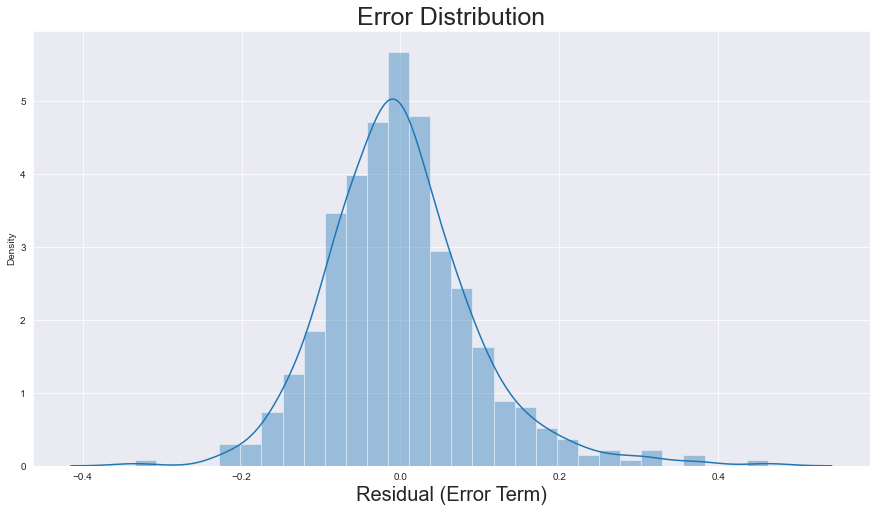

In [63]:
y_train_pred = lr5.predict(x_train_sm)
residual = y_train_pred - y_train
plt.figure(figsize=(15,8))
sns.distplot(residual)
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 20})
plt.title('Error Distribution', fontdict={'fontsize': 25})
plt.show()

**Insight**: From the above histogram, we could see that the residuals are normally distributed. Hence, our assumption for Linear Regression is valid.

##### Checking if Error terms are Independent to each other

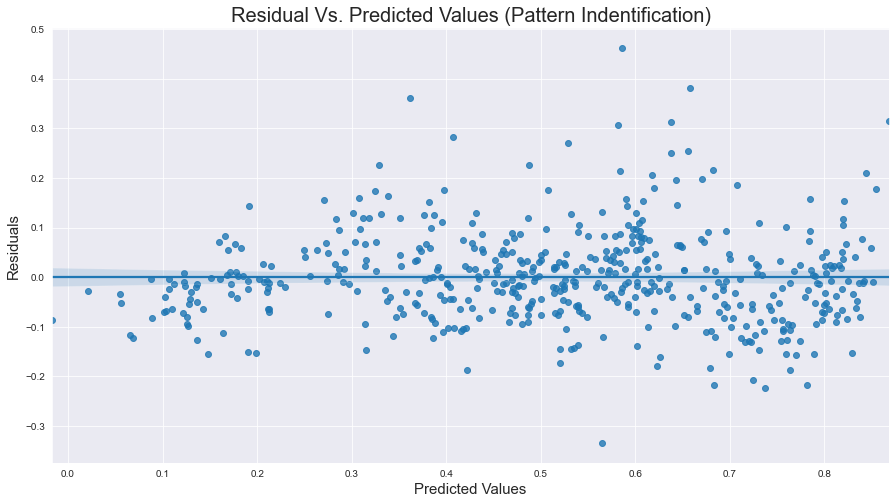

In [64]:
plt.figure(figsize=(15,8))
sns.regplot(x=y_train_pred, y=residual)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

##### Checking Pearson value between predicted values and residuals to check for any correlation

In [65]:
print("Pearson Value for Predicted Value Against Residual ==>", pearsonr(y_train_pred, residual)[0])

Pearson Value for Predicted Value Against Residual ==> 1.061650767297806e-15


**Insight**:
- From the graph above, we see that there is almost no relation (any identifiable pattern) between residuals and predicted values. This is what we had expected from our model to have no specific pattern.
- Similarly, the very low pearson R value ~0, indicates that there is no pattern between the residuals and the predicted values.

##### Homoscedasticity

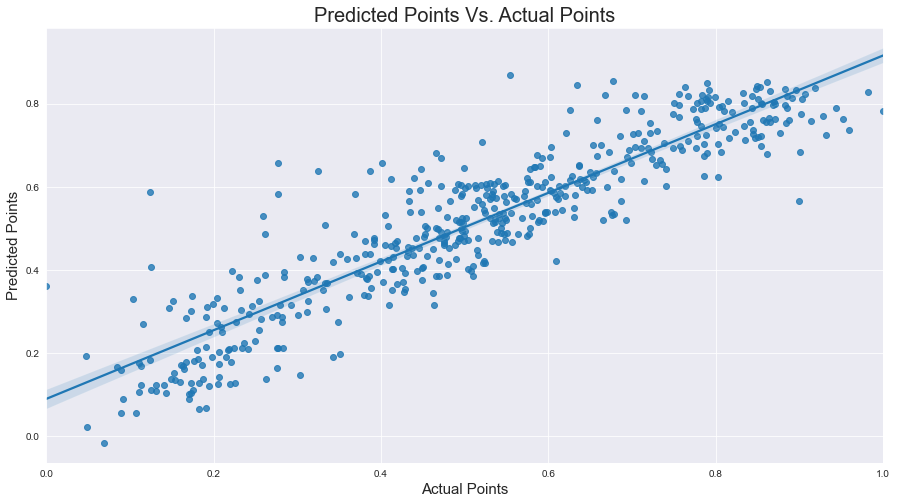

In [66]:
plt.figure(figsize=(15,8))
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

**Insight**:

From the above graph, we can say that residuals are equal distributed across predicted value. This means we see equal variance and we do NOT observe high concentration of data points in certain region & low conecentarion in certain regions.

***This proves Homoscedasticity of Error Terms***.

##### Checking for Multicorrelation

In [67]:
# Checking vif values for all the features

vif = pd.DataFrame()
x = x_train_rfe
vif['Feature'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values('VIF', ascending=False)

,Feature,VIF
2,windspeed,4.85
1,temp,4.17
4,season_winter,2.32
0,yr,2.04
3,season_spring,1.89
7,mnth_November,1.79
10,weathersit_Mist_cloudy,1.51
5,mnth_December,1.34
6,mnth_March,1.21
8,mnth_September,1.18


**Insight**: The VIF for all the predictors is less than 5, hence there is very low multicollinearity between the predictors.

### Predicting on Test Data

In [68]:
# Scaling the testing data using standard scaler created earlier

df_test[numerical_features] = scaler.transform(df_test[numerical_features])
df_test.head(10)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
22,0,0,1,0.046591,0.025950,0.453529,0.462217,0.110907,1,0,...,0,0,0,0,0,0,1,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,0,1,...,0,0,0,0,1,0,0,0,0,0
553,1,0,1,0.951196,0.933712,0.596104,0.212829,0.534975,0,0,...,0,0,1,0,0,0,0,0,0,0
504,1,0,1,0.699909,0.662746,0.551083,0.478229,0.817648,0,1,...,0,0,1,0,0,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,0,0,0,0,1,0,0,0,1
386,1,0,1,0.128804,0.109186,0.827273,0.365403,0.224919,1,0,...,0,0,0,0,0,0,1,0,0,1
415,1,1,0,0.275214,0.255073,0.527611,0.426105,0.357455,1,0,...,0,0,0,0,0,0,0,1,0,0
599,1,0,1,0.793363,0.732369,0.660606,0.128237,0.890819,0,0,...,0,0,0,0,0,0,0,0,0,0
301,0,0,1,0.243025,0.195377,0.916883,0.678208,0.069604,0,0,...,1,0,1,0,0,0,0,0,1,0
352,0,0,1,0.271061,0.264973,0.662338,0.310273,0.388978,0,0,...,0,0,0,0,0,0,0,1,0,0


##### Diving testing data into x and y

In [69]:
# Dividing the testing data into X and Y

y_test = df_test.pop('cnt')
x_test = df_test

##### Filtering Test Input & Reserving Required Features Obtained Earlier

In [70]:
# Extracting only the final features selected with model 5

x_test = x_test[x_train_rfe.columns]
x_test = sm.add_constant(x_test)

##### Making Predictions on Test Data

In [71]:
# Making predictions using 5th model

y_pred = lr5.predict(x_test)

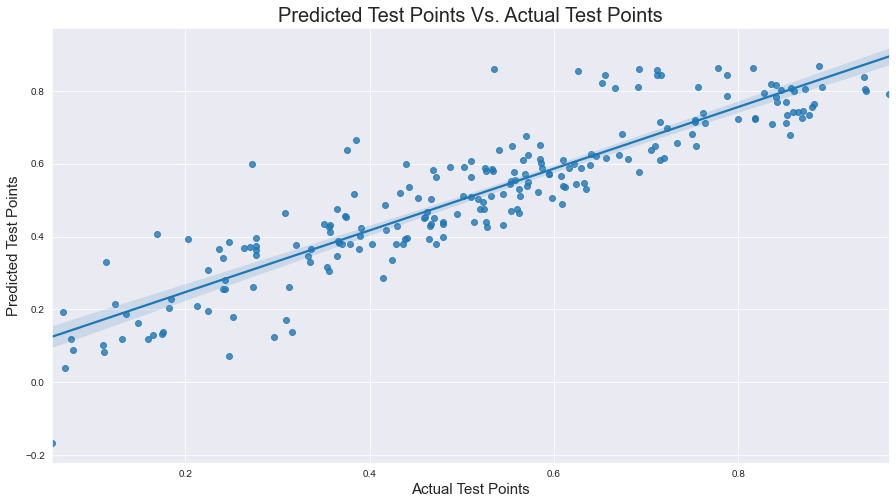

In [72]:
# Plotting predicted test values vs actual test values.

plt.figure(figsize=(15,8))
corr_plot = sns.regplot(x=y_test, y=y_pred)
plt.title('Predicted Test Points Vs. Actual Test Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Test Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Test Points', fontdict={'fontsize': 15})
plt.show()

**Insight**:
Above Scatter Plot Shows Linear Relationship between Actual Test Data Points & Predicted Test Data Points.

### Model Evaluation

In [73]:
# Checking the root mean squared error

np.sqrt(mean_squared_error(y_test, y_pred))

0.09400786529779138

In [74]:
# Checking the r2_score for the model

r2 = r2_score(y_test, y_pred)
r2

0.816491628821747

In [75]:
# Checking adjusted r2 score

# n is number of rows in X
n = x_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = x_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8058018207919458

### Final Result Comparison

- Train R^2 : 0.827
- Train Adjusted R^2 : 0.823
- Test R^2 : 0.816
- Test Adjusted R^2 : 0.805

This seems to be a really good model that can very well 'Generalize' various datasets.